## Feature Scaling 

3. Transformations

In [80]:
### Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
## Reading the dataset

data = pd.read_csv('C:\Feature_engineering_complete\Datasets\kaggle_diabetes.csv')

In [82]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [83]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [84]:
data.shape

(2000, 9)

### Transformation is done on skewed data to get a normal distribution. 

In [85]:
## Simple for loop for finding numerical features

numerical_features = [x for x in data.columns if data[x].dtype!='O']

In [86]:
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## We have various tranformers, End goal is to convert data into Normal distribution. 

In [87]:
## Dependent and independent features
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [88]:
## Train - test split

from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

### Log transformation

In [89]:
import scipy.stats as stat
from matplotlib import pylab

In [90]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

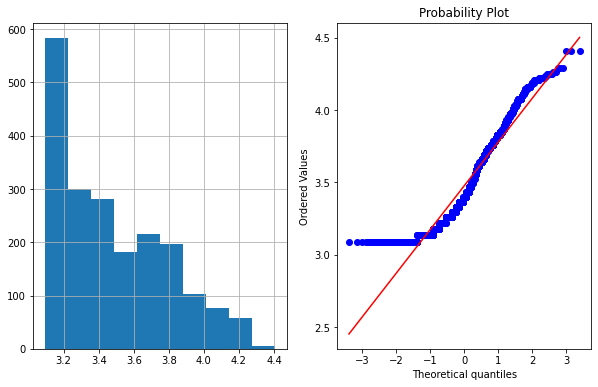

In [91]:
data['Age_log']=np.log(data['Age']+1)
plot_data(data,'Age_log')

### Reciprocal tansformation

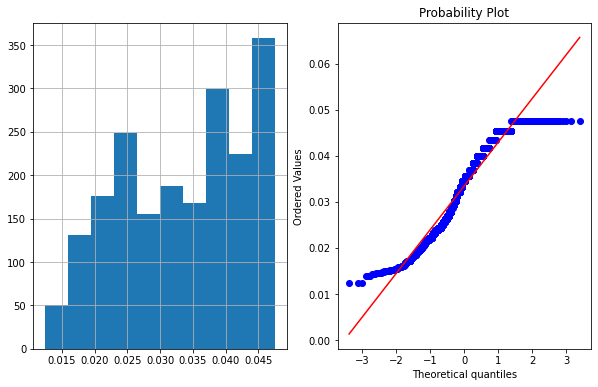

In [92]:
data['Age_reciprocal']=1/data.Age
plot_data(data,'Age_reciprocal')

## Square root transformation

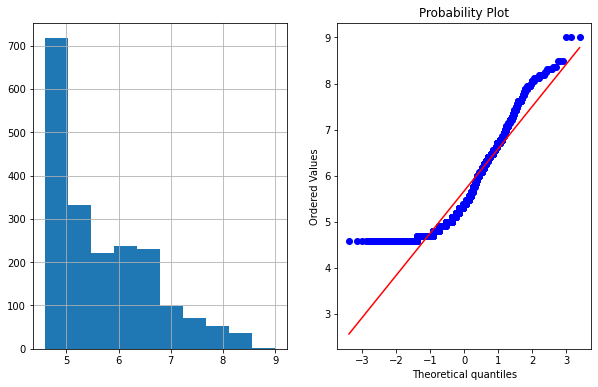

In [93]:
##### Square Root Transformation
data['Age_sqaure']=data.Age**(1/2)
plot_data(data,'Age_sqaure')

### Exponential Transdormation


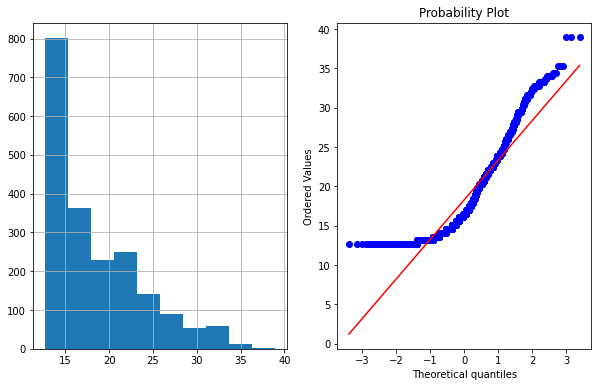

In [94]:
data['Age_exponential']=data.Age**(1/1.2)
plot_data(data,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. 
λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [95]:
data['Age_Boxcox'],parameters=stat.boxcox(data['Age'])

In [96]:
print(parameters)

-1.1459832359684843


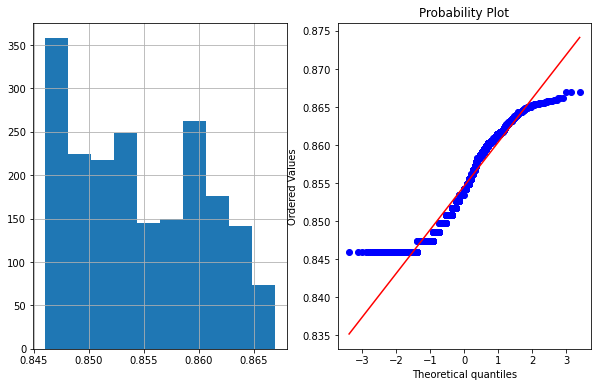

In [97]:
plot_data(data,'Age_Boxcox')